In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

In [2]:
import zipfile
import os

# Define the zip file path and extraction path
zip_file_path = r"/content/Teeth DataSet.zip"
extract_path = r"/content/Teeth DataSet"

# Create the extraction folder if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [3]:
import os
import shutil

# Paths
test_dir = r"/content/Teeth DataSet/Teeth_Dataset/Testing"
selected_test_dir =r"/content/Teeth DataSet/Teeth_Dataset/New_Testing"

# Create the new directory if it doesn't exist
if not os.path.exists(selected_test_dir):
    os.makedirs(selected_test_dir)

# List all folders in the test directory
all_folders = sorted([f for f in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, f))])

# Select the first 7 folders
selected_folders = all_folders[:7]

# Move the selected folders to the new directory
for folder in selected_folders:
    src = os.path.join(test_dir, folder)
    dst = os.path.join(selected_test_dir, folder)
    shutil.copytree(src, dst)

print(f"Selected folders: {selected_folders}")


Selected folders: ['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']


In [12]:
# Define image size and batch size
image_size = (150, 150)  # Example size, adjust as needed
batch_size = 32

# Data augmentation settings
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    #fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
   r"/content/Teeth DataSet/Teeth_Dataset/Training",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    r"/content/Teeth DataSet/Teeth_Dataset/Validation",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    r"/content/Teeth DataSet/Teeth_Dataset/New_Testing",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


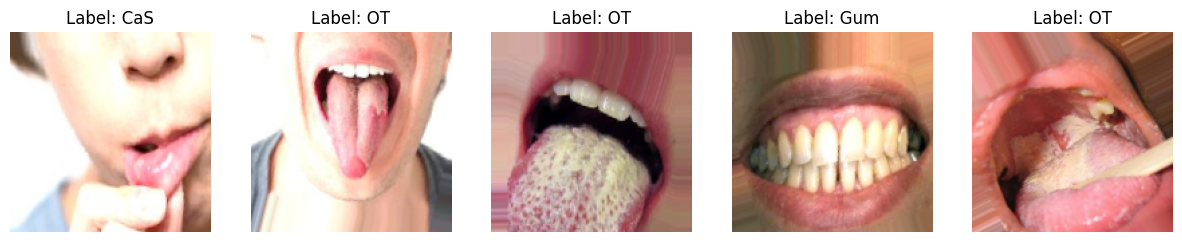

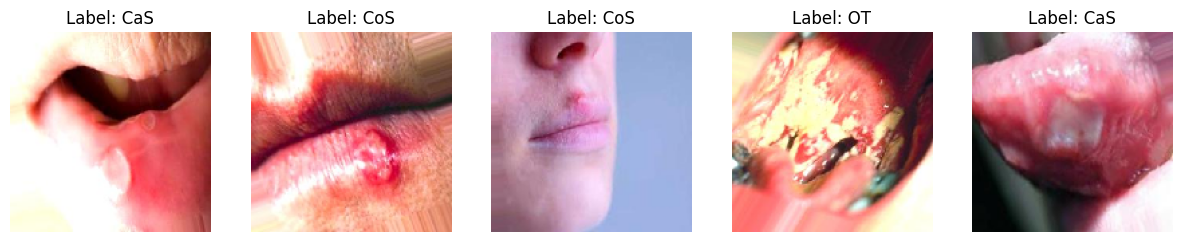

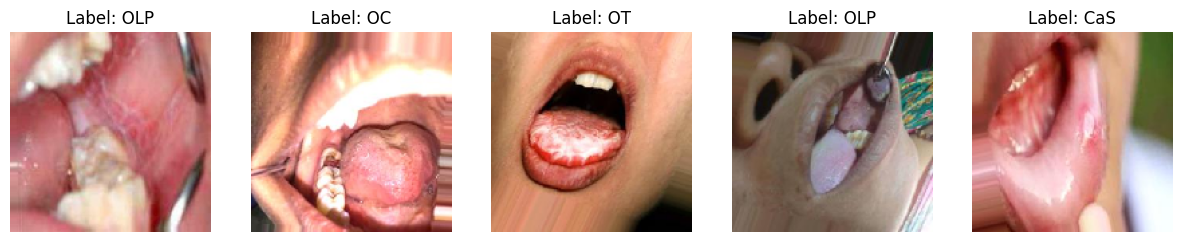

In [5]:
def plot_images(generator, num_images=5):
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        image, label = next(generator)
        plt.subplot(1, num_images, i+1)
        plt.imshow(image[0])
        # Get the class index with the highest probability and use it to fetch the label
        predicted_class_index = label[0].argmax()
        predicted_class_label = list(generator.class_indices.keys())[list(generator.class_indices.values()).index(predicted_class_index)]
        plt.title(f"Label: {predicted_class_label}")
        plt.axis('off')
    plt.show()

# Visualize images from each set
plot_images(train_generator)
plot_images(val_generator)
plot_images(test_generator)

In [ ]:
#def conv_block(x, filters, num_conv_layers):
#    for _ in range(num_conv_layers):
#        x = layers.Conv2D(filters, (3, 3), padding='same', activation='relu')(x)
#    x = layers.MaxPooling2D((2, 2))(x)
#    return x

#def vgg16_model(input_shape=(224, 224, 3), num_classes=7):
#    inputs = tf.keras.Input(shape=input_shape)

    # Convolutional layers
#    x = conv_block(inputs, 64, 2)
#    x = conv_block(x, 128, 2)
#    x = conv_block(x, 256, 3)
#    x = conv_block(x, 512, 3)
#    x = conv_block(x, 512, 3)

    # Fully connected layers
#    x = layers.Flatten()(x)
#    x = layers.Dense(4096, activation='relu')(x)
#    x = layers.Dropout(0.5)(x)
#    x = layers.Dense(4096, activation='relu')(x)
#    x = layers.Dropout(0.5)(x)
#    outputs = layers.Dense(num_classes, activation='softmax')(x)

#    model = models.Model(inputs, outputs)
#    return model

In [ ]:
#model = vgg16_model(input_shape=(150, 150, 3), num_classes=7)

In [14]:
model = models.Sequential([
    # First Convolutional Block
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Second Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten and Fully Connected Layers
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),  # Increased Dense layer size for more complexity
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),  # Increased Dense layer size for more complexity
    layers.Dropout(0.5),

    # Output Layer
    layers.Dense(7, activation='softmax')  # 7 classes for your teeth classification task
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1024)                │      42,468,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,089,991 (164.38 MB)

 Trainable params: 43,089,991 (164.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,  # Your training data generator
    epochs=50,
    validation_data=val_generator  # Your validation data generator
)

Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 33s 275ms/step - accuracy: 0.1605 - loss: 2.2077 - val_accuracy: 0.2695 - val_loss: 1.8581
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - accuracy: 0.2760 - loss: 1.8198 - val_accuracy: 0.3366 - val_loss: 1.6838
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 21s 207ms/step - accuracy: 0.3602 - loss: 1.6481 - val_accuracy: 0.4368 - val_loss: 1.4445
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 20s 195ms/step - accuracy: 0.4154 - loss: 1.5061 - val_accuracy: 0.4883 - val_loss: 1.3398
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 21s 191ms/step - accuracy: 0.4905 - loss: 1.3746 - val_accuracy: 0.5224 - val_loss: 1.2729
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 40s 193ms/step - accuracy: 0.5317 - loss: 1.2795 - val_accuracy: 0.5593 - val_loss: 1.1975
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 21s 198ms/step - accuracy: 0.5650 - loss: 1.1528 - val_accuracy: 0.6226 - val_loss: 1.0306
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 39s 192ms/step - accuracy: 0.5983 - loss: 1.0634 - val_accu

In [10]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9231 - loss: 0.2023
Test Accuracy: 0.9357976913452148


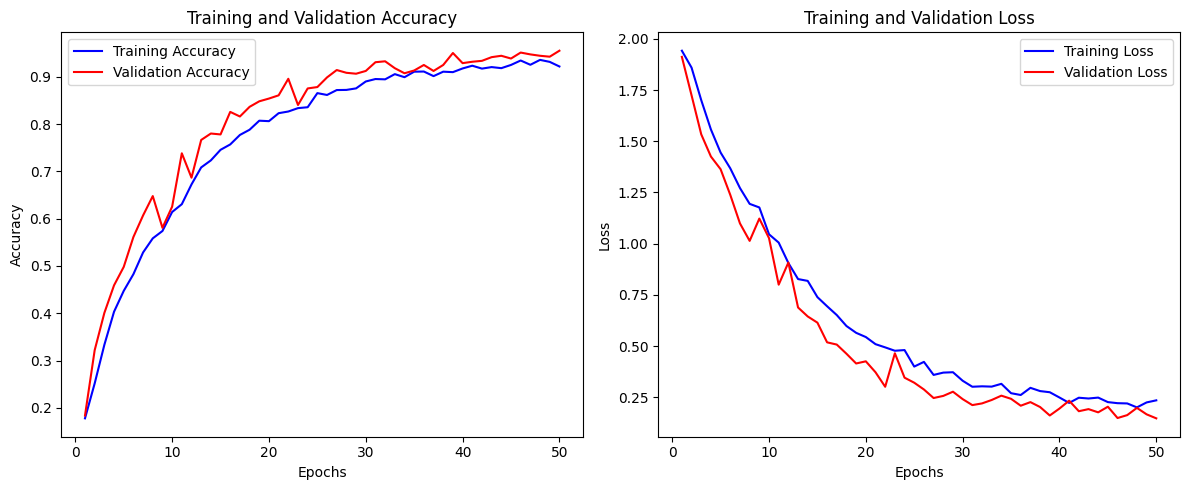

In [11]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Plots training and validation accuracy and loss separately.

    Parameters:
    history: History object returned by model.fit()
    """
    # Extract accuracy and loss data from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Plot training and validation accuracy
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Show the plots
    plt.tight_layout()
    plt.show()
# Plot the training history
plot_training_history(history)